In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.api import tsa
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('data/diffdate-sunspots.csv', index_col = 'YEAR')
df

,SUNACTIVITY
YEAR,
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2


<Axes: xlabel='YEAR'>

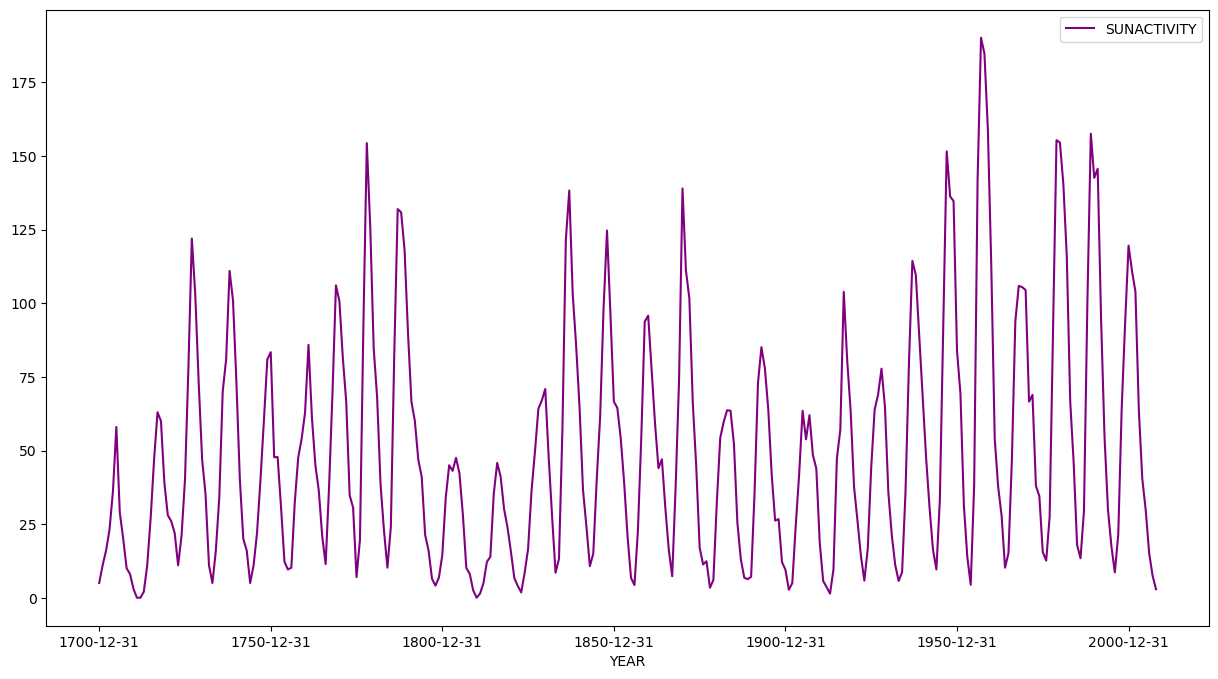

In [15]:
df.plot(figsize=(15,8), color = 'purple')

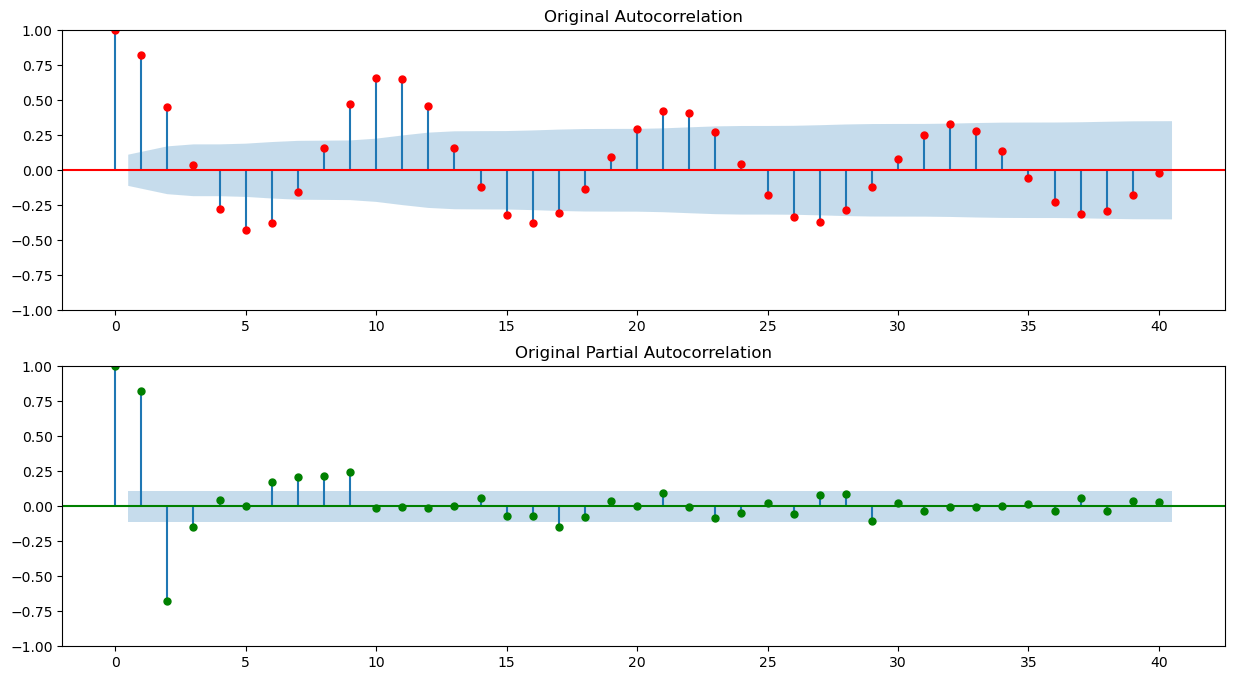

In [16]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df.values.squeeze(), lags=40, ax=ax1, color = 'r', title='Original Autocorrelation')
ax2 = fig.add_subplot(212)
fig = plot_pacf(df, lags=40, ax=ax2, color = 'g', title='Original Partial Autocorrelation')

In [17]:
arma20 = ARIMA(df, order=(2,0,0)).fit()
display(arma20.params)
display(arma20.aic, arma20.bic, arma20.hqic)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727182
dtype: float64

2622.6370933011694

2637.5704584087603

2628.6074811464155

In [18]:
arma30 = ARIMA(df, order=(3,0,0)).fit()
display(arma30.params)
display(arma30.aic, arma30.bic, arma30.hqic)

const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64

2619.4036292456476

2638.0703356301365

2626.866614052205

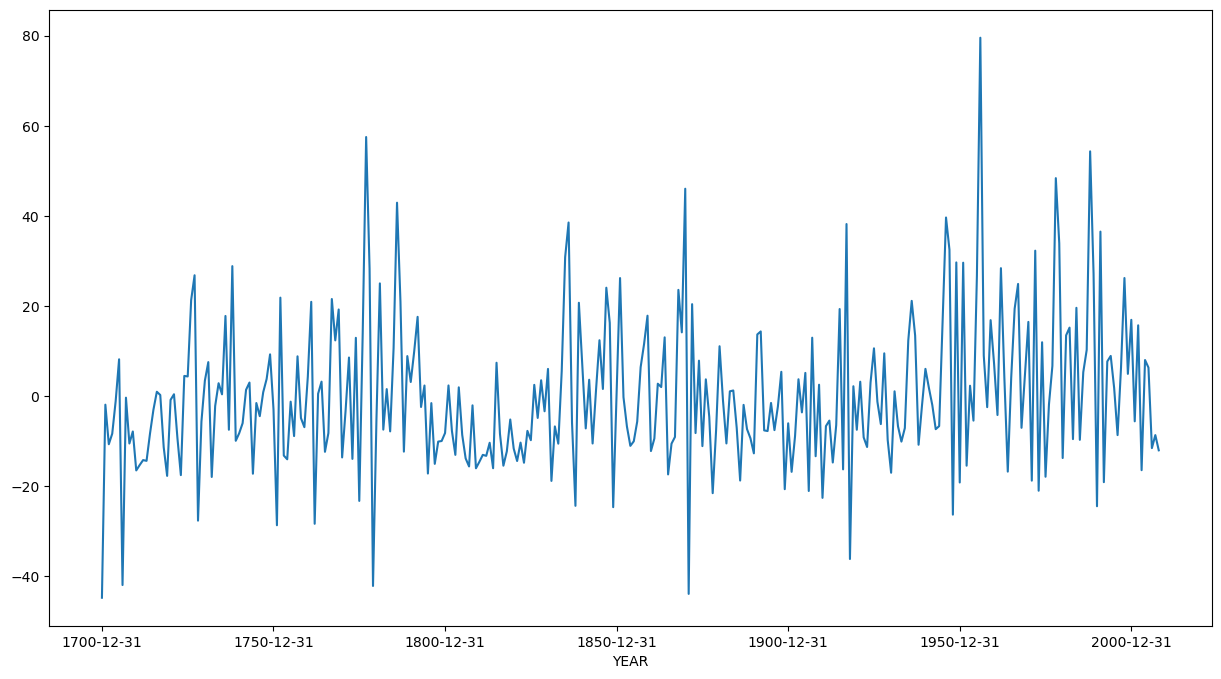

In [19]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax = arma30.resid.plot(ax=ax)

In [20]:
resid = arma30.resid
stats.normaltest(resid)

NormaltestResult(statistic=49.843932216707096, pvalue=1.5015079671899095e-11)

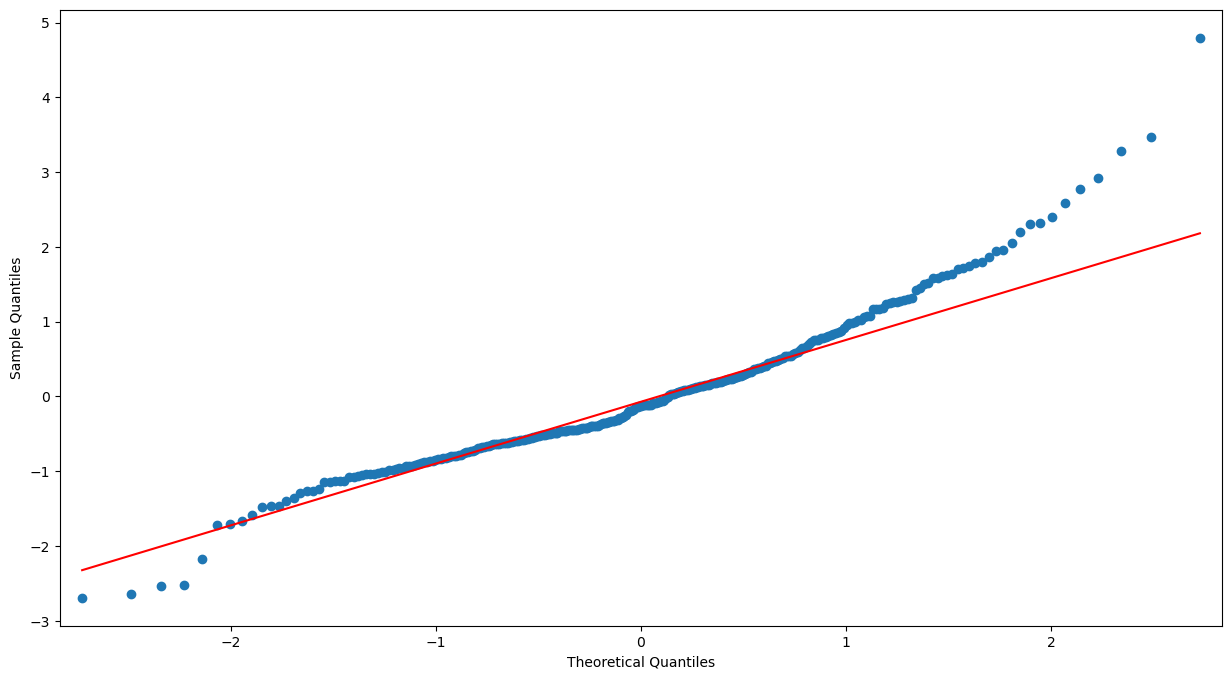

In [21]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

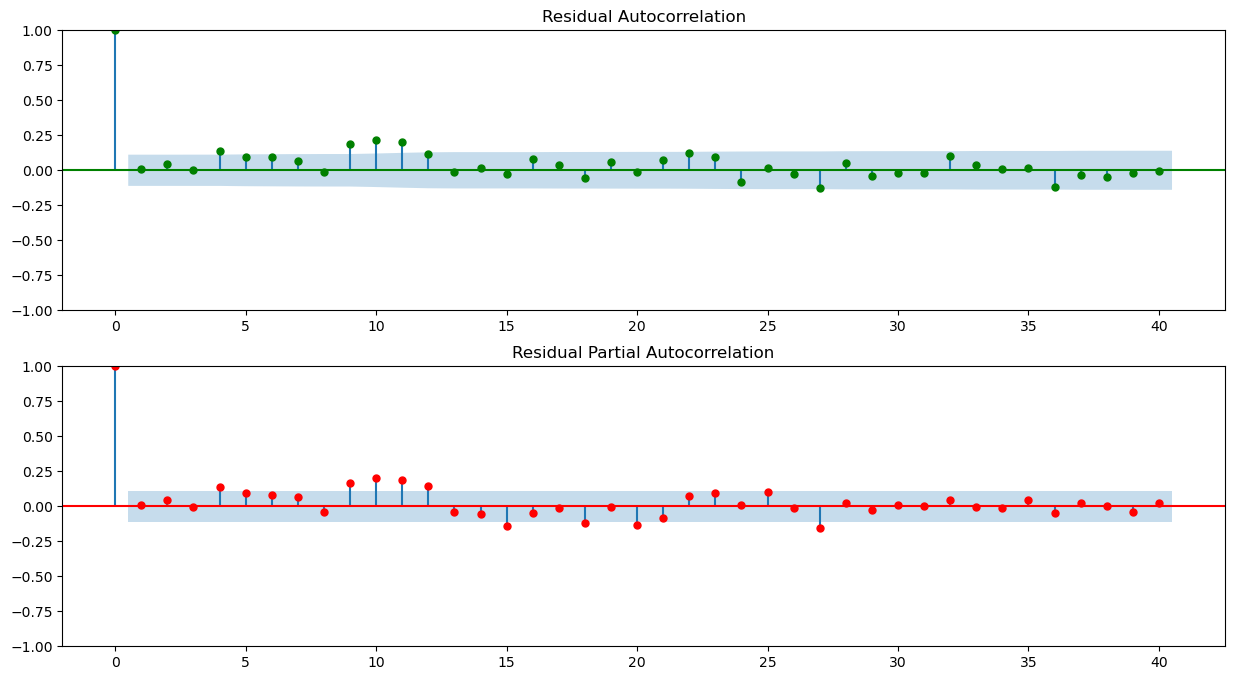

In [22]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(resid.values.squeeze(), lags=40, ax=ax1, color='g', title='Residual Autocorrelation')
ax2 = fig.add_subplot(212)
fig = plot_pacf(resid, lags=40, ax=ax2, color='r', title='Residual Partial Autocorrelation')

In [23]:
r, q, p = tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[np.arange(1, 25), r[1:], q, p]

In [24]:
df2 = pd.DataFrame(data, columns = ['Lag', 'AC', 'Q', 'Prob(>Q)'])
df2.set_index('Lag')

,AC,Q,Prob(>Q)
Lag,,,
1.0,0.009170,0.026239,8.713184e-01
2.0,0.041793,0.572982,7.508939e-01
3.0,-0.001338,0.573544,9.024612e-01
4.0,0.136086,6.408642,1.706385e-01
5.0,0.092465,9.111351,1.047043e-01
6.0,0.091947,11.792661,6.675737e-02
7.0,0.068747,13.296552,6.520425e-02
8.0,-0.015022,13.368601,9.978086e-02
9.0,0.187590,24.641072,3.394963e-03


In [25]:
predict_sunspots = arma30.predict('1990', '2012', dynamic=True)
predict_sunspots = predict_sunspots['1990-12-31':'2008-12-31']
predict_sunspots = pd.DataFrame(predict_sunspots)
predict_sunspots.head()

,predicted_mean
1990-12-31,167.048337
1991-12-31,140.995022
1992-12-31,94.862115
1993-12-31,46.864439
1994-12-31,11.246106


In [26]:
np.mean((df['1990-12-31':'2008-12-31':1]['SUNACTIVITY'].values  - predict_sunspots['predicted_mean'].values))

5.634832996309524